In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import Lasso
from xgboost import plot_importance
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import StandardScaler
import plotly.express as px

In [2]:
#Read dataset
df = pd.read_csv('house.csv')
df

id  log_price property_type        room_type  \
0       6901257   5.010635     Apartment  Entire home/apt   
1       6304928   5.129899     Apartment  Entire home/apt   
2       7919400   4.976734     Apartment  Entire home/apt   
3      13418779   6.620073         House  Entire home/apt   
4       3808709   4.744932     Apartment  Entire home/apt   
...         ...        ...           ...              ...   
74106  14549287   4.605170     Apartment     Private room   
74107  13281809   5.043425     Apartment  Entire home/apt   
74108  18688039   5.220356     Apartment  Entire home/apt   
74109  17045948   5.273000     Apartment  Entire home/apt   
74110   3534845   4.852030          Boat  Entire home/apt   

                                               amenities  accommodates  \
0      {"Wireless Internet","Air conditioning",Kitche...             3   
1      {"Wireless Internet","Air conditioning",Kitche...             7   
2      {TV,"Cable TV","Wireless Internet","Air condit...             5   
3      {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
4      {TV,Internet,"Wireless Internet","Air conditio...             2   
...                                                  ...           ...   
74106                                                 {}             1   
74107  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
74108  {TV,Internet,"Wireless Internet","Air conditio...             5   
74109  {TV,"Wireless Internet","Air conditioning",Kit...             2   
74110  {TV,Internet,"Wireless Internet",Kitchen,"Free...             4   

       bathrooms  bed_type cancellation_policy  cleaning_fee  ...   latitude  \
0            1.0  Real Bed              strict          True  ...  40.696524   
1            1.0  Real Bed              strict          True  ...  40.766115   
2            1.0  Real Bed            moderate          True  ...  40.808110   
3            1.0  Real Bed            flexible          True  ...  37.772004   
4            1.0  Real Bed            moderate          True  ...  38.925627   
...          ...       ...                 ...           ...  ...        ...   
74106        1.0  Real Bed            flexible         False  ...  40.709025   
74107        2.0  Real Bed            moderate          True  ...  33.871549   
74108        1.0  Real Bed            moderate          True  ...  40.706749   
74109        1.0  Real Bed              strict          True  ...  40.738535   
74110        1.0  Real Bed            moderate         False  ...  33.761096   

        longitude                                        name  \
0      -73.991617              Beautiful brownstone 1-bedroom   
1      -73.989040    Superb 3BR Apt Located Near Times Square   
2      -73.943756                            The Garden Oasis   
3     -122.431619          Beautiful Flat in the Heart of SF!   
4      -77.034596                  Great studio in midtown DC   
...           ...                                         ...   
74106  -73.939405                           one room bushwick   
74107 -118.396053                Spacious Hermosa 2 BR on PCH   
74108  -73.942377  Modern 2 Bedroom Apartment in Williamsburg   
74109  -74.000157        Designer's Apartment in HEART of NYC   
74110 -118.192409              Cozy Boat at Shoreline Village   

          neighbourhood number_of_reviews review_scores_rating  \
0      Brooklyn Heights                 2                100.0   
1        Hell's Kitchen                 6                 93.0   
2                Harlem                10                 92.0   
3          Lower Haight                 0                  NaN   
4      Columbia Heights                 4                 40.0   
...                 ...               ...                  ...   
74106      Williamsburg                 0                  NaN   
74107     Hermosa Beach                16                 93.0   
74108      Williamsburg                43              

In [3]:
#Summary statistic
df.describe()

id     log_price  accommodates     bathrooms      latitude  \
count  7.411100e+04  74111.000000  74111.000000  73911.000000  74111.000000   
mean   1.126662e+07      4.782069      3.155146      1.235263     38.445958   
std    6.081735e+06      0.717394      2.153589      0.582044      3.080167   
min    3.440000e+02      0.000000      1.000000      0.000000     33.338905   
25%    6.261964e+06      4.317488      2.000000      1.000000     34.127908   
50%    1.225415e+07      4.709530      2.000000      1.000000     40.662138   
75%    1.640226e+07      5.220356      4.000000      1.000000     40.746096   
max    2.123090e+07      7.600402     16.000000      8.000000     42.390437   

          longitude  number_of_reviews  review_scores_rating      bedrooms  \
count  74111.000000       74111.000000          57389.000000  74020.000000   
mean     -92.397525          20.900568             94.067365      1.265793   
std       21.705322          37.828641              7.836556      0.852143   
min     -122.511500           0.000000             20.000000      0.000000   
25%     -118.342374           1.000000             92.000000      1.000000   
50%      -76.996965           6.000000             96.000000      1.000000   
75%      -73.954660          23.000000            100.000000      1.000000   
max      -70.985047         605.000000            100.000000     10.000000   

               beds  
count  73980.000000  
mean       1.710868  
std        1.254142  
min        0.000000  
25%        1.000000  
50%        1.000000  
75%        2.000000  
max       18.000000

In [4]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [5]:
df.shape # (number of rows, number of columns)

(74111, 29)

In [6]:
# Count null values
df.isna().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [7]:
# Drop columns we won't use
df = df.drop(['id','thumbnail_url','zipcode','instant_bookable',
              'host_response_rate','name','description','first_review','last_review'],axis=1)

In [8]:
# Fill NaN by Mean
review_scores_rating_avg = df.review_scores_rating.mean()
df.review_scores_rating = df.review_scores_rating.fillna(review_scores_rating_avg)

In [9]:
# Fill NaN by mode
df['host_has_profile_pic'].fillna(df['host_has_profile_pic'].mode()[0], inplace=True)
df['host_identity_verified'].fillna(df['host_identity_verified'].mode()[0], inplace=True)
df['host_since'].fillna(df['host_since'].mode()[0], inplace=True)

In [10]:
# Ensure that there is no NaN in the dataframe
df = df.dropna()

In [11]:
# Change type to (int)
df['bathrooms'] = df.bathrooms.astype('int')
df['accommodates'] = df.accommodates.astype('int')
df['review_scores_rating'] = df.review_scores_rating.astype('int')
df['bedrooms'] = df.bedrooms.astype('int')
df['beds'] = df.beds.astype('int')

In [12]:
# Drop wrong data
df.loc[df.room_type == 4.782069108304868]
df = df.drop(index=11632)

In [13]:
df['price'] = np.exp(df['log_price']) #Convert (log_price) to decimal as (price)  
count = np.isinf(df['price']).values.sum() # Checking that there are no infinite values
count

0

In [14]:
df

log_price property_type        room_type  \
0       5.010635     Apartment  Entire home/apt   
1       5.129899     Apartment  Entire home/apt   
2       4.976734     Apartment  Entire home/apt   
3       6.620073         House  Entire home/apt   
4       4.744932     Apartment  Entire home/apt   
...          ...           ...              ...   
74106   4.605170     Apartment     Private room   
74107   5.043425     Apartment  Entire home/apt   
74108   5.220356     Apartment  Entire home/apt   
74109   5.273000     Apartment  Entire home/apt   
74110   4.852030          Boat  Entire home/apt   

                                               amenities  accommodates  \
0      {"Wireless Internet","Air conditioning",Kitche...             3   
1      {"Wireless Internet","Air conditioning",Kitche...             7   
2      {TV,"Cable TV","Wireless Internet","Air condit...             5   
3      {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
4      {TV,Internet,"Wireless Internet","Air conditio...             2   
...                                                  ...           ...   
74106                                                 {}             1   
74107  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
74108  {TV,Internet,"Wireless Internet","Air conditio...             5   
74109  {TV,"Wireless Internet","Air conditioning",Kit...             2   
74110  {TV,Internet,"Wireless Internet",Kitchen,"Free...             4   

       bathrooms  bed_type cancellation_policy  cleaning_fee city  ...  \
0              1  Real Bed              strict          True  NYC  ...   
1              1  Real Bed              strict          True  NYC  ...   
2              1  Real Bed            moderate          True  NYC  ...   
3              1  Real Bed            flexible          True   SF  ...   
4              1  Real Bed            moderate          True   DC  ...   
...          ...       ...                 ...           ...  ...  ...   
74106          1  Real Bed            flexible         False  NYC  ...   
74107          2  Real Bed            moderate          True   LA  ...   
74108          1  Real Bed            moderate          True  NYC  ...   
74109          1  Real Bed              strict          True  NYC  ...   
74110          1  Real Bed            moderate         False   LA  ...   

      host_identity_verified  host_since   latitude   longitude  \
0                          t  2012-03-26  40.696524  -73.991617   
1                          f  2017-06-19  40.766115  -73.989040   
2                          t  2016-10-25  40.808110  -73.943756   
3                          t  2015-04-19  37.772004 -122.431619   
4                          t  2015-03-01  38.925627  -77.034596   
...                      ...         ...        ...         ...   
74106                      t  2013-03-24  40.709025  -73.939405   
74107                      f  2016-05-03  33.871549 -118.396053   
74108                      t  2012-01-05  40.706749  -73.942377   
74109                      f  2017-09-17  40.738535  -74.000157   
74110                      t  2012-11-26  33.761096 -118.192409   

          neighbourhood number_of_reviews  review_scores_rating  bedrooms  \
0      Brooklyn Heights                 2                   100         1   
1        Hell's Kitchen                 6                    93         3   
2                Harlem                10                    92         1   
3          Lower Haight                 0                    94         2   
4      Columbia Heights                 4                    40         0   
...                 ...               ...                   ...       ...   
74106      Williamsburg                 0                    94         1   
74107     Hermosa Beach                16                    93         2   
74108      Williamsburg                43                    94         2   
74109      West Village                 0

In [15]:
# Dataframe columns
df.columns

Index(['log_price', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'host_has_profile_pic', 'host_identity_verified', 'host_since',
       'latitude', 'longitude', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'bedrooms', 'beds', 'price'],
      dtype='object')

In [16]:
# Total real estate prices for each city
df.groupby('city')[['log_price']].sum()

log_price
city                  
Boston    16890.638184
Chicago   14139.404268
DC        24369.849639
LA        80861.690631
NYC      151819.353578
SF        33112.714737

In [17]:
df.review_scores_rating = df.review_scores_rating.apply(lambda x: str(x)+'%')

In [18]:
rat_value = df.review_scores_rating.value_counts().sort_values(ascending=False).head(10)

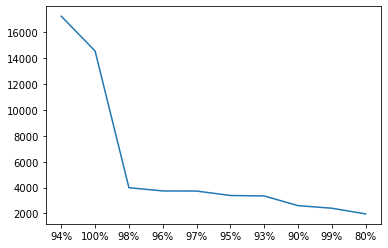

In [19]:
plt.plot(rat_value)

In [20]:
# The number of real estate per city
df.city.value_counts()

NYC        32164
LA         16960
SF          6402
DC          4875
Boston      3458
Chicago     3059
Name: city, dtype: int64

In [21]:
# The number of real estate for each type
df.property_type.value_counts()

Apartment             45571
House                 13756
Condominium            2392
Townhouse              1489
Loft                   1148
Other                   541
Guesthouse              437
Bed & Breakfast         398
Bungalow                310
Guest suite             120
Dorm                    119
Villa                   109
Timeshare                77
In-law                   71
Boutique hotel           69
Hostel                   63
Camper/RV                58
Cabin                    56
Boat                     50
Serviced apartment       19
Castle                   12
Tent                     11
Vacation home            10
Yurt                      7
Treehouse                 6
Chalet                    5
Hut                       4
Earth House               3
Tipi                      3
Cave                      2
Casa particular           1
Train                     1
Name: property_type, dtype: int64

In [22]:
df.groupby('accommodates')[['log_price']].count()

log_price
accommodates           
1                  8515
2                 28845
3                  7039
4                 10972
5                  3096
6                  4464
7                   852
8                  1592
9                   237
10                  601
11                   68
12                  228
13                   33
14                   87
15                   49
16                  240

In [23]:
city_price = df.groupby('city')[['price']].sum()
city_price

price
city              
Boston    573158.0
Chicago   407459.0
DC       1077677.0
LA       2734567.0
NYC      4605611.0
SF       1458264.0

In [24]:
xx = df.loc[:,['property_type','log_price']]
xx

property_type  log_price
0         Apartment   5.010635
1         Apartment   5.129899
2         Apartment   4.976734
3             House   6.620073
4         Apartment   4.744932
...             ...        ...
74106     Apartment   4.605170
74107     Apartment   5.043425
74108     Apartment   5.220356
74109     Apartment   5.273000
74110          Boat   4.852030

[66918 rows x 2 columns]

In [25]:
x = df.loc[:,['city','log_price']]
x

city  log_price
0      NYC   5.010635
1      NYC   5.129899
2      NYC   4.976734
3       SF   6.620073
4       DC   4.744932
...    ...        ...
74106  NYC   4.605170
74107   LA   5.043425
74108  NYC   5.220356
74109  NYC   5.273000
74110   LA   4.852030

[66918 rows x 2 columns]

<AxesSubplot:>

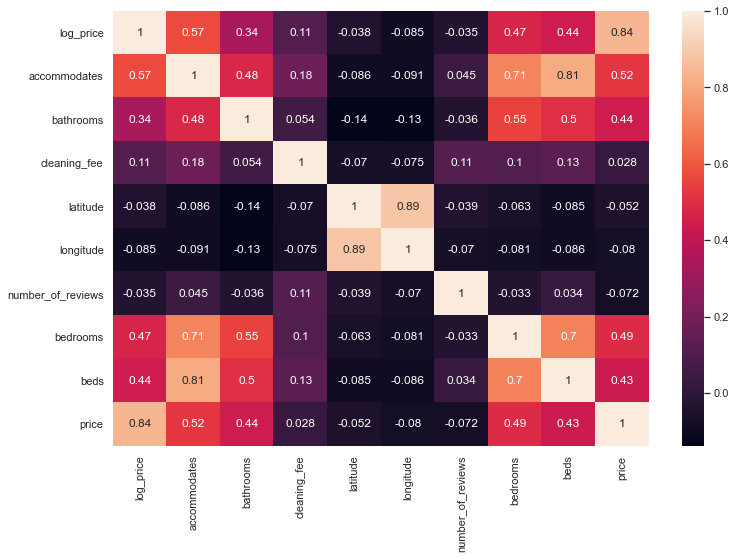

In [26]:
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(df.corr(),annot=True)

In [27]:
df.groupby(['city','property_type'])[['log_price']].count().sort_values('log_price',ascending=False)

log_price
city    property_type                
NYC     Apartment               27330
LA      Apartment                7695
        House                    6654
SF      Apartment                3513
NYC     House                    2668
...                               ...
LA      Cave                        1
NYC     Castle                      1
Boston  Serviced apartment          1
NYC     Earth House                 1
Chicago Villa                       1

[135 rows x 1 columns]

In [28]:
high_price = df.groupby(['city','neighbourhood'])[['log_price']].count()
high_price

log_price
city   neighbourhood                   
Boston Allston-Brighton             414
       Back Bay                     291
       Beacon Hill                  203
       Brookline                      2
       Cambridge                      2
...                                 ...
SF     Twin Peaks                    76
       Union Square                  35
       Visitacion Valley             37
       West Portal                   11
       Western Addition/NOPA        396

[643 rows x 1 columns]

In [29]:
# Number of real estate that have a cleaning service
clean_value = df.cleaning_fee.value_counts()
clean_value

True     49178
False    17740
Name: cleaning_fee, dtype: int64

In [30]:
fig = px.pie(df,names=df['cleaning_fee'], title='What is the percentage of cleaning?')
fig.update_traces(textposition='inside', textinfo='percent+label')

In [31]:
policy = df.cancellation_policy.value_counts()
policy = policy.head(3)
fig = px.pie(policy,names=df['cancellation_policy'], title='Policy type')
fig.update_traces(textposition='inside', textinfo='percent+label')

In [32]:
fig = px.bar(df, x=df['room_type'].value_counts().index, y=df['room_type'].value_counts(), text= df['room_type'].value_counts(), title='What type of rooms is most requested?',
            labels={'x':'Room Types', 'y':'Counts'})
fig.update_traces(textposition='outside')
fig.show()

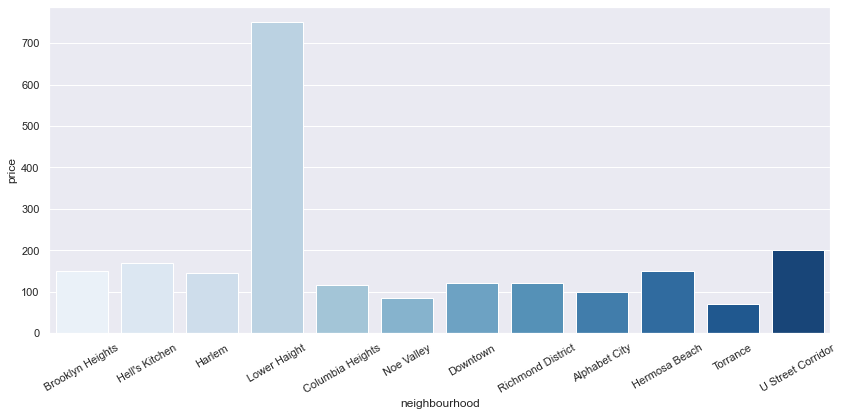

In [33]:
plt.figure(figsize=[14, 6])
sns.barplot( x=df['neighbourhood'].head(12), y=df['price'].head(12),palette="Blues");
plt.xticks(rotation = 30);

Q-The most requested type of property

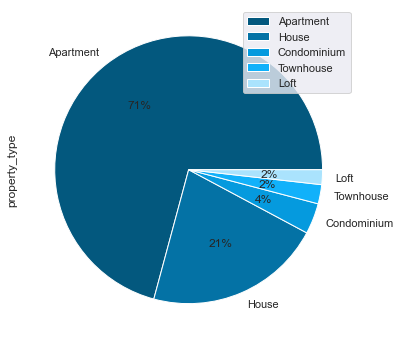

In [34]:
fig = plt.figure(1, figsize=(6,6))
ax = fig.add_subplot(111)
ax.axis('equal')
colors=['#03587e', '#0472a5',  '#059ade', '#11b1fa','#aae3fd']

mylabels = ["Apartment", "House", "Condominium", "Townhouse","Loft"]
df['property_type'].value_counts().head(5).plot.pie(autopct='%1.0f%%',labels=mylabels,colors=colors)
plt.legend()

Highest price neighborhood

The city with the highest price

In [35]:
fig = px.bar(city_price, y=city_price['price'], text='price', title='Most income cities')
fig.update_traces(textposition='outside')
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

<AxesSubplot:>

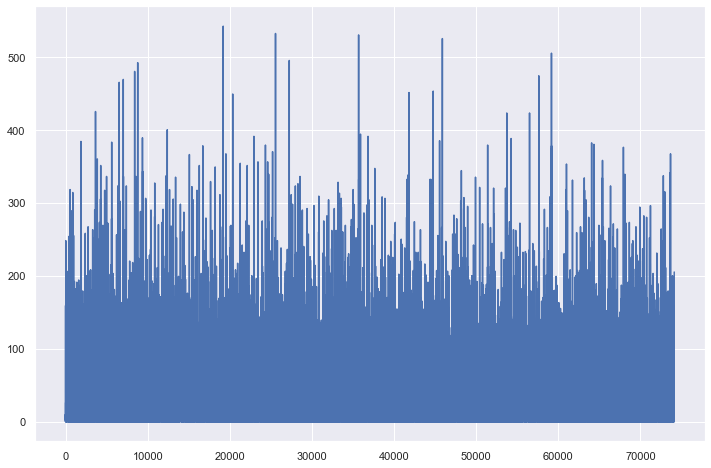

In [36]:
df.number_of_reviews.plot()

<AxesSubplot:>

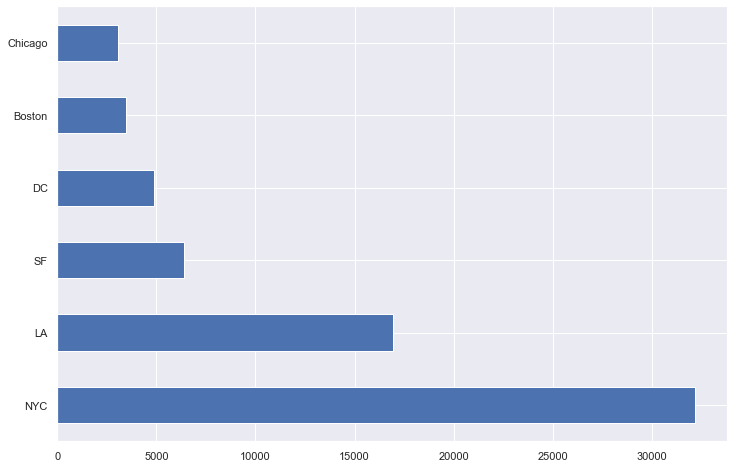

In [37]:
df.city.value_counts().plot(kind='barh')

In [38]:
# The most common types
df.property_type.value_counts().head(5)

Apartment      45571
House          13756
Condominium     2392
Townhouse       1489
Loft            1148
Name: property_type, dtype: int64

<AxesSubplot:xlabel='accommodates'>

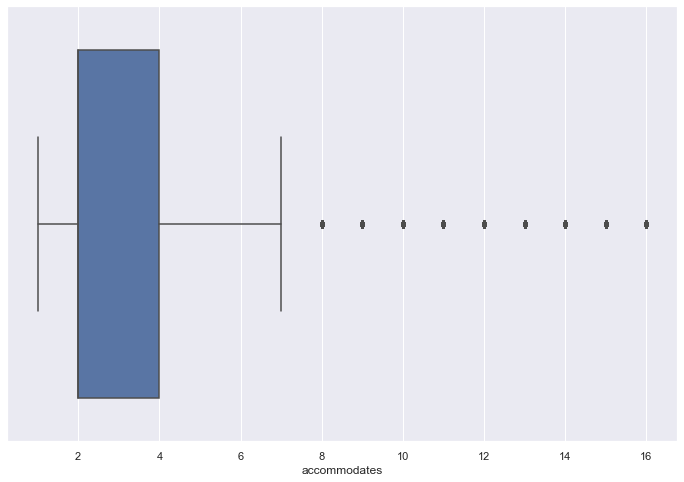

In [39]:
# Check for outliers
sns.boxplot(x=df['accommodates'])

In [40]:
df[df['accommodates'] > 7].count()

log_price                 3135
property_type             3135
room_type                 3135
amenities                 3135
accommodates              3135
bathrooms                 3135
bed_type                  3135
cancellation_policy       3135
cleaning_fee              3135
city                      3135
host_has_profile_pic      3135
host_identity_verified    3135
host_since                3135
latitude                  3135
longitude                 3135
neighbourhood             3135
number_of_reviews         3135
review_scores_rating      3135
bedrooms                  3135
beds                      3135
price                     3135
dtype: int64

In [41]:
# Replace all values greater than 7 with 7.
df['accommodates'].values[df['accommodates'] > 7] = 7

<AxesSubplot:xlabel='bathrooms'>

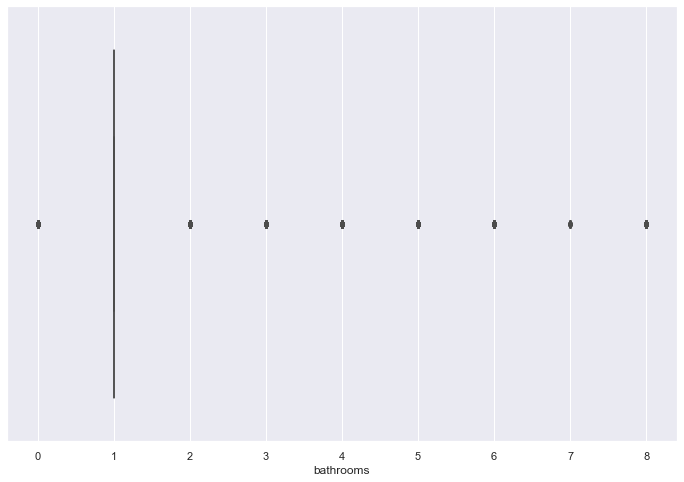

In [42]:
# Check for outliers
sns.boxplot(x=df['bathrooms'])

In [43]:
# This means that most of the values are equal to 1 .
mask = df.bathrooms == 1
df[mask]

log_price property_type        room_type  \
0       5.010635     Apartment  Entire home/apt   
1       5.129899     Apartment  Entire home/apt   
2       4.976734     Apartment  Entire home/apt   
3       6.620073         House  Entire home/apt   
4       4.744932     Apartment  Entire home/apt   
...          ...           ...              ...   
74103   5.135798     Apartment  Entire home/apt   
74106   4.605170     Apartment     Private room   
74108   5.220356     Apartment  Entire home/apt   
74109   5.273000     Apartment  Entire home/apt   
74110   4.852030          Boat  Entire home/apt   

                                               amenities  accommodates  \
0      {"Wireless Internet","Air conditioning",Kitche...             3   
1      {"Wireless Internet","Air conditioning",Kitche...             7   
2      {TV,"Cable TV","Wireless Internet","Air condit...             5   
3      {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
4      {TV,Internet,"Wireless Internet","Air conditio...             2   
...                                                  ...           ...   
74103  {TV,"Cable TV",Internet,"Wireless Internet","A...             2   
74106                                                 {}             1   
74108  {TV,Internet,"Wireless Internet","Air conditio...             5   
74109  {TV,"Wireless Internet","Air conditioning",Kit...             2   
74110  {TV,Internet,"Wireless Internet",Kitchen,"Free...             4   

       bathrooms  bed_type cancellation_policy  cleaning_fee city  ...  \
0              1  Real Bed              strict          True  NYC  ...   
1              1  Real Bed              strict          True  NYC  ...   
2              1  Real Bed            moderate          True  NYC  ...   
3              1  Real Bed            flexible          True   SF  ...   
4              1  Real Bed            moderate          True   DC  ...   
...          ...       ...                 ...           ...  ...  ...   
74103          1  Real Bed            moderate          True   SF  ...   
74106          1  Real Bed            flexible         False  NYC  ...   
74108          1  Real Bed            moderate          True  NYC  ...   
74109          1  Real Bed              strict          True  NYC  ...   
74110          1  Real Bed            moderate         False   LA  ...   

      host_identity_verified  host_since   latitude   longitude  \
0                          t  2012-03-26  40.696524  -73.991617   
1                          f  2017-06-19  40.766115  -73.989040   
2                          t  2016-10-25  40.808110  -73.943756   
3                          t  2015-04-19  37.772004 -122.431619   
4                          t  2015-03-01  38.925627  -77.034596   
...                      ...         ...        ...         ...   
74103                      f  2011-09-26  37.789989 -122.407384   
74106                      t  2013-03-24  40.709025  -73.939405   
74108                      t  2012-01-05  40.706749  -73.942377   
74109                      f  2017-09-17  40.738535  -74.000157   
74110                      t  2012-11-26  33.761096 -118.192409   

          neighbourhood number_of_reviews  review_scores_rating bedrooms  \
0      Brooklyn Heights                 2                  100%        1   
1        Hell's Kitchen                 6                   93%        3   
2                Harlem                10                   92%        1   
3          Lower Haight                 0                   94%        2   
4      Columbia Heights                 4                   40%        0   
...                 ...               ...                   ...      ...   
74103      Union Square                24                   98%        1   
74106      Williamsburg                 0                   94%        1   
74108      Williamsburg                43                   94%        2   
74109      West Village                 0          

<AxesSubplot:xlabel='bedrooms'>

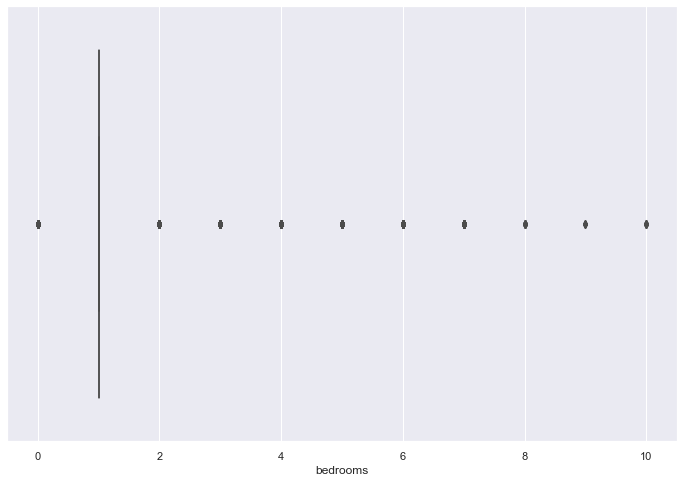

In [44]:
# Check for outliers
sns.boxplot(x=df['bedrooms'])

In [45]:
# This means that most of the values are equal to 1 .
mask = df.bedrooms == 1
df[mask]

log_price property_type        room_type  \
0       5.010635     Apartment  Entire home/apt   
2       4.976734     Apartment  Entire home/apt   
5       4.442651     Apartment     Private room   
7       4.787492   Condominium  Entire home/apt   
8       4.787492         House     Private room   
...          ...           ...              ...   
74100   4.605170     Apartment     Private room   
74102   4.110874         Villa      Shared room   
74103   5.135798     Apartment  Entire home/apt   
74106   4.605170     Apartment     Private room   
74110   4.852030          Boat  Entire home/apt   

                                               amenities  accommodates  \
0      {"Wireless Internet","Air conditioning",Kitche...             3   
2      {TV,"Cable TV","Wireless Internet","Air condit...             5   
5      {TV,"Wireless Internet",Heating,"Smoke detecto...             2   
7      {TV,"Cable TV","Wireless Internet","Wheelchair...             2   
8      {TV,"Cable TV","Wireless Internet","Pets live ...             2   
...                                                  ...           ...   
74100  {Internet,"Wireless Internet","Air conditionin...             2   
74102  {TV,"Wireless Internet","Air conditioning",Kit...             7   
74103  {TV,"Cable TV",Internet,"Wireless Internet","A...             2   
74106                                                 {}             1   
74110  {TV,Internet,"Wireless Internet",Kitchen,"Free...             4   

       bathrooms  bed_type cancellation_policy  cleaning_fee city  ...  \
0              1  Real Bed              strict          True  NYC  ...   
2              1  Real Bed            moderate          True  NYC  ...   
5              1  Real Bed              strict          True   SF  ...   
7              1  Real Bed            moderate          True   LA  ...   
8              1  Real Bed            moderate          True   SF  ...   
...          ...       ...                 ...           ...  ...  ...   
74100          1  Real Bed              strict          True  NYC  ...   
74102          3  Real Bed            flexible         False   LA  ...   
74103          1  Real Bed            moderate          True   SF  ...   
74106          1  Real Bed            flexible         False  NYC  ...   
74110          1  Real Bed            moderate         False   LA  ...   

      host_identity_verified  host_since   latitude   longitude  \
0                          t  2012-03-26  40.696524  -73.991617   
2                          t  2016-10-25  40.808110  -73.943756   
5                          t  2017-06-07  37.753164 -122.429526   
7                          t  2013-05-18  34.046737 -118.260439   
8                          f  2015-06-04  37.781128 -122.501095   
...                      ...         ...        ...         ...   
74100                      t  2012-02-16  40.715080  -73.945856   
74102                      f  2013-07-01  34.199671 -118.618070   
74103                      f  2011-09-26  37.789989 -122.407384   
74106                      t  2013-03-24  40.709025  -73.939405   
74110                      t  2012-11-26  33.761096 -118.192409   

           neighbourhood number_of_reviews  review_scores_rating bedrooms  \
0       Brooklyn Heights                 2                  100%        1   
2                 Harlem                10                   92%        1   
5             Noe Valley                 3                  100%        1   
7               Downtown                 9                   93%        1   
8      Richmond District               159                   99%        1   
...                  ...               ...                   ...      ...   
74100       Williamsburg                32                   93%        1   
74102         West Hills                 1                   80%        1   
74103       Union Square                24                   98%        1   
74106       Williamsburg                 

<AxesSubplot:xlabel='beds'>

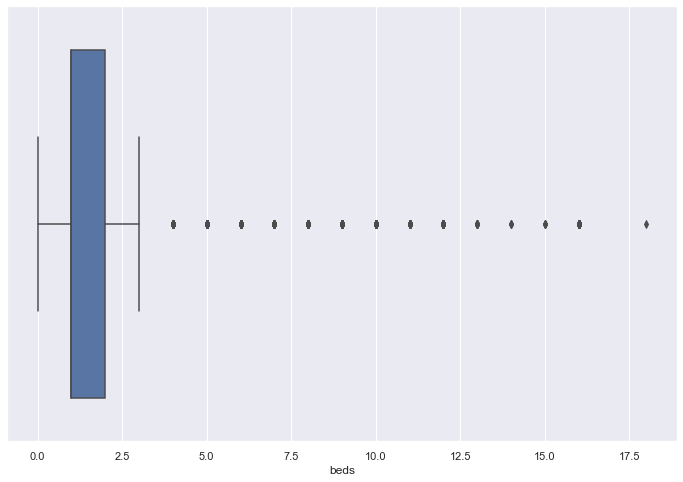

In [46]:
# Check for outliers
sns.boxplot(x=df['beds'])

In [47]:
df[df['beds'] > 3].count()

log_price                 5035
property_type             5035
room_type                 5035
amenities                 5035
accommodates              5035
bathrooms                 5035
bed_type                  5035
cancellation_policy       5035
cleaning_fee              5035
city                      5035
host_has_profile_pic      5035
host_identity_verified    5035
host_since                5035
latitude                  5035
longitude                 5035
neighbourhood             5035
number_of_reviews         5035
review_scores_rating      5035
bedrooms                  5035
beds                      5035
price                     5035
dtype: int64

In [48]:
# Replace all values greater than 3 with 3.
df['beds'].values[df['beds'] > 3] = 3

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



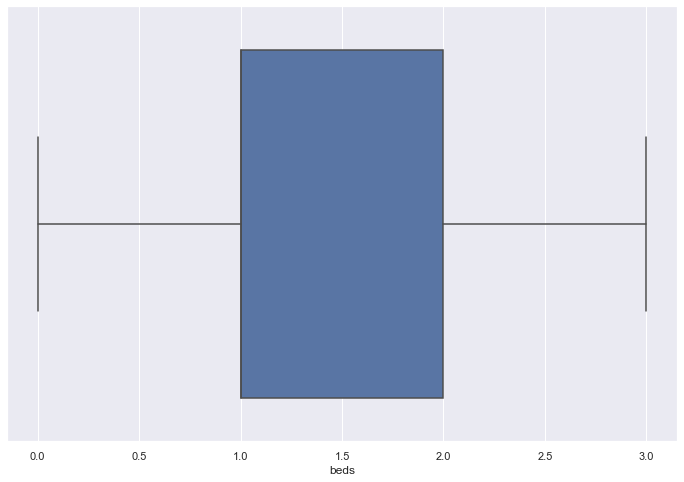

In [49]:
sns.boxplot(df['beds'])
plt.show()

<AxesSubplot:xlabel='log_price'>

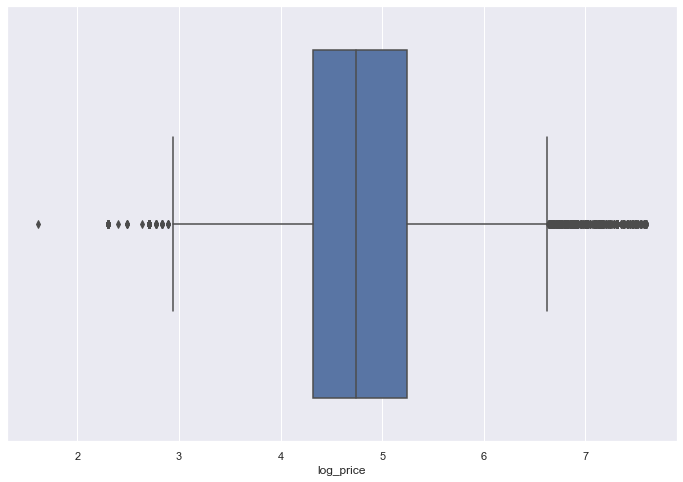

In [50]:
# Check for outliers
sns.boxplot(x=df['log_price'])

In [51]:
df[df['log_price'] < 3.1].count()

log_price                 200
property_type             200
room_type                 200
amenities                 200
accommodates              200
bathrooms                 200
bed_type                  200
cancellation_policy       200
cleaning_fee              200
city                      200
host_has_profile_pic      200
host_identity_verified    200
host_since                200
latitude                  200
longitude                 200
neighbourhood             200
number_of_reviews         200
review_scores_rating      200
bedrooms                  200
beds                      200
price                     200
dtype: int64

In [52]:
df[df['log_price'] > 6.5].count()

log_price                 1430
property_type             1430
room_type                 1430
amenities                 1430
accommodates              1430
bathrooms                 1430
bed_type                  1430
cancellation_policy       1430
cleaning_fee              1430
city                      1430
host_has_profile_pic      1430
host_identity_verified    1430
host_since                1430
latitude                  1430
longitude                 1430
neighbourhood             1430
number_of_reviews         1430
review_scores_rating      1430
bedrooms                  1430
beds                      1430
price                     1430
dtype: int64

In [53]:
# Replace all values less than 3.1 with 3.1
df['log_price'].values[df['log_price'] < 3.1] = 3.1

In [54]:
# Replace all values greater than 6.5 with 6.5
df['log_price'].values[df['log_price'] > 6.5] = 6.5

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



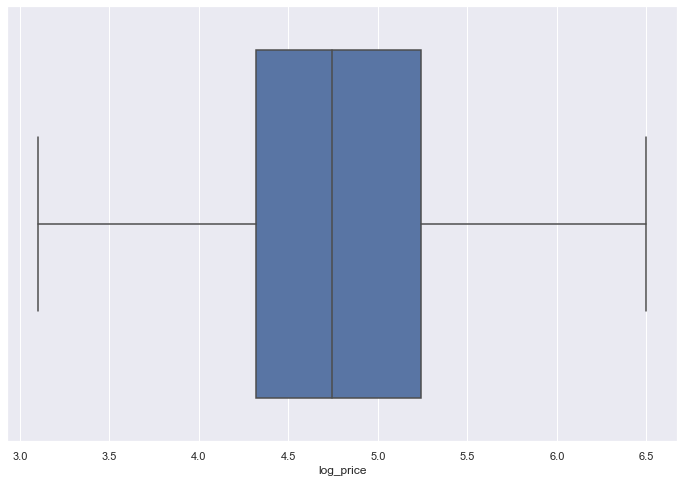

In [55]:
sns.boxplot(df['log_price'])
plt.show()

<__array_function__ internals>:5: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.

<__array_function__ internals>:5: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



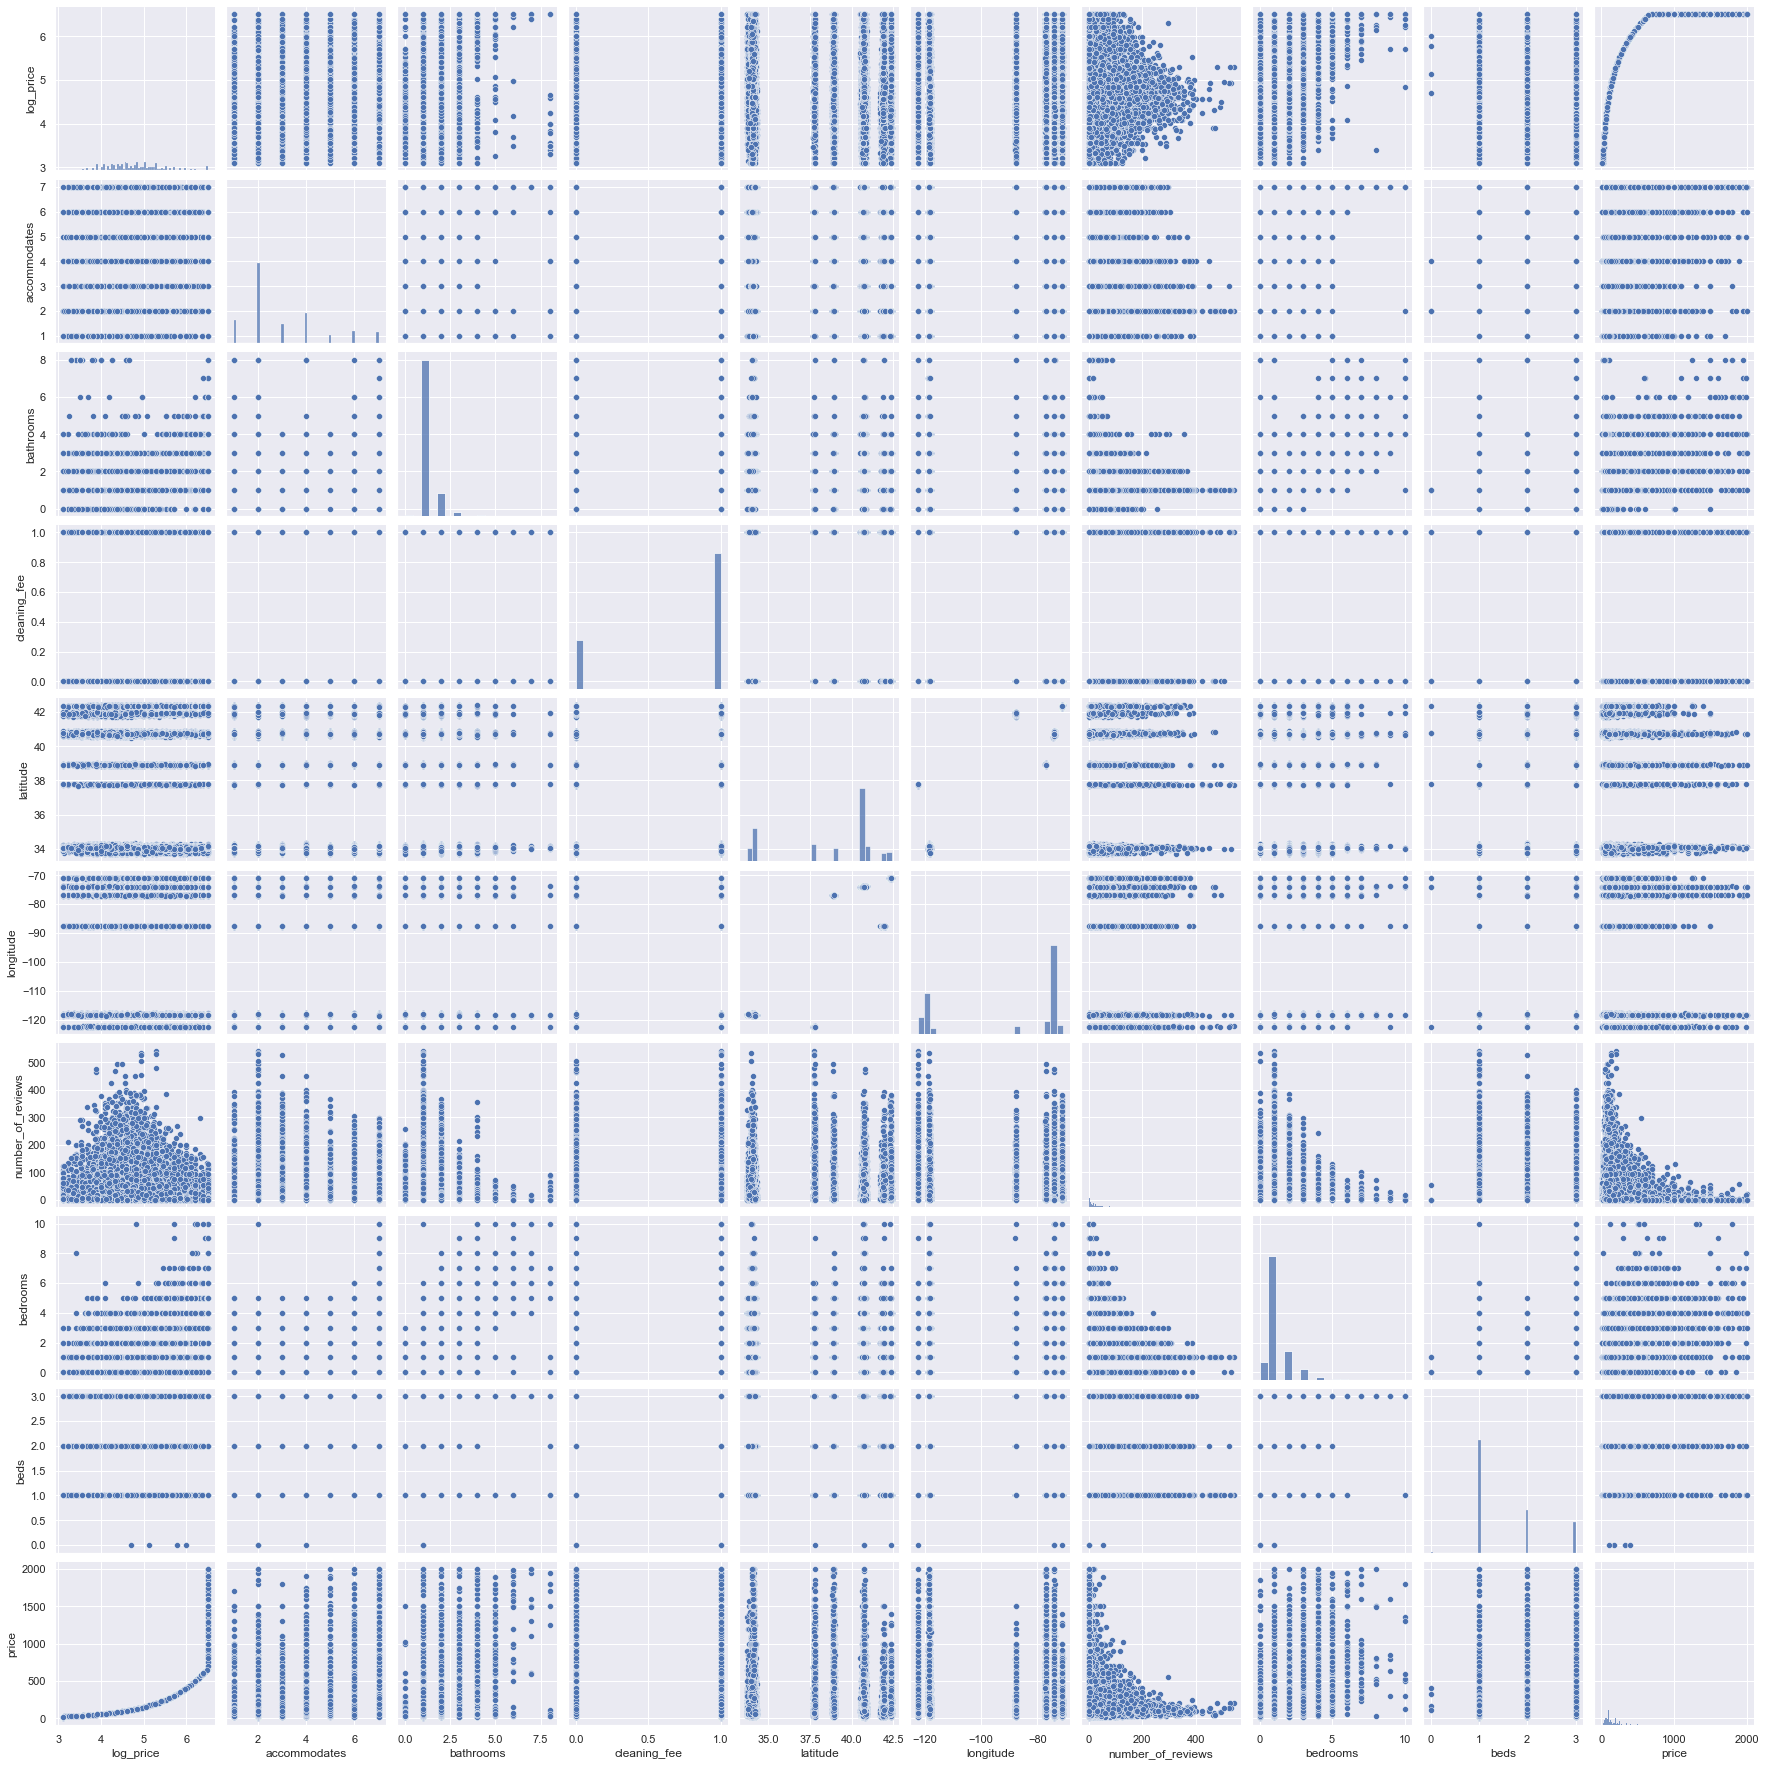

In [56]:
sns.pairplot(df)

In [57]:
# Change (object) to (0 and 1)
X = pd.get_dummies(df, columns = ['neighbourhood','property_type','room_type'])
X

log_price                                          amenities  \
0       5.010635  {"Wireless Internet","Air conditioning",Kitche...   
1       5.129899  {"Wireless Internet","Air conditioning",Kitche...   
2       4.976734  {TV,"Cable TV","Wireless Internet","Air condit...   
3       6.500000  {TV,"Cable TV",Internet,"Wireless Internet",Ki...   
4       4.744932  {TV,Internet,"Wireless Internet","Air conditio...   
...          ...                                                ...   
74106   4.605170                                                 {}   
74107   5.043425  {TV,"Cable TV",Internet,"Wireless Internet",Ki...   
74108   5.220356  {TV,Internet,"Wireless Internet","Air conditio...   
74109   5.273000  {TV,"Wireless Internet","Air conditioning",Kit...   
74110   4.852030  {TV,Internet,"Wireless Internet",Kitchen,"Free...   

       accommodates  bathrooms  bed_type cancellation_policy  cleaning_fee  \
0                 3          1  Real Bed              strict          True   
1                 7          1  Real Bed              strict          True   
2                 5          1  Real Bed            moderate          True   
3                 4          1  Real Bed            flexible          True   
4                 2          1  Real Bed            moderate          True   
...             ...        ...       ...                 ...           ...   
74106             1          1  Real Bed            flexible         False   
74107             4          2  Real Bed            moderate          True   
74108             5          1  Real Bed            moderate          True   
74109             2          1  Real Bed              strict          True   
74110             4          1  Real Bed            moderate         False   

      city host_has_profile_pic host_identity_verified  ...  \
0      NYC                    t                      t  ...   
1      NYC                    t                      f  ...   
2      NYC                    t                      t  ...   
3       SF                    t                      t  ...   
4       DC                    t                      t  ...   
...    ...                  ...                    ...  ...   
74106  NYC                    t                      t  ...   
74107   LA                    t                      f  ...   
74108  NYC                    t                      t  ...   
74109  NYC                    t                      f  ...   
74110   LA                    t                      t  ...   

      property_type_Tipi  property_type_Townhouse  property_type_Train  \
0                      0                        0                    0   
1                      0                        0                    0   
2                      0                        0                    0   
3                      0                        0                    0   
4                      0                        0                    0   
...                  ...                      ...                  ...   
74106                  0                        0                    0   
74107                  0                        0                    0   
74108                  0                        0                    0   
74109                  0                        0                    0   
74110                  0                        0                    0   

       property_type_Treehouse property_type_Vacation home  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
...                        ...                         ...   
74106                        0                           0   
74107                        0                           0   
74108        

In [58]:
# Drop columns we won't use in the models
# X is the input
X.drop(['bedrooms','bathrooms', 'amenities', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city', 'host_has_profile_pic', 'host_identity_verified',
              'host_since', 'latitude', 'longitude', 'review_scores_rating', 'log_price', 'number_of_reviews', 'price'], axis=1, inplace=True)

In [59]:
# Y is the output
Y = df['log_price']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # Split the model 80 for train and 20 for test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(53534, 656)
(13384, 656)
(53534,)
(13384,)


Linear Regression

In [61]:
# Fit a linear regression model on the train data set
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [62]:
# Check the R-squared value of the model on the training data
model.score(X_train,y_train)

0.6423384947002663

In [63]:
# Check the R-squared value of the model on the testing data
model.score(X_test,y_test)

0.6433670041706492

In [64]:
# Compare the actual y values in the train set with the predicted values
predictions_train = model.predict(X_train)
predictions_train.shape

(53534,)

In [65]:
# Check the RMSE (root mean squared error) on the training data
sqrt(mean_squared_error(y_train, predictions_train))

0.40936731246609764

In [66]:
# Compare the actual y values in the test set with the predicted values
predictions_test = model.predict(X_test)
predictions_test.shape

(13384,)

In [67]:
# Check the RMSE (root mean squared error) on the test data
sqrt(mean_squared_error(y_test, predictions_test))

0.40900578353868

In [68]:
def create_map(city):
    if city in {'NYC', 'LA'}:
        fraction = 0.1
    else:
        fraction = 0.4
        
    df_temp = df[df['city'] == city].sample(frac=fraction,random_state=42)
    df_temp['price'] = np.round(df_temp['price'], 2)
    
    fig = px.scatter_mapbox(df_temp, 
                            lat="latitude", 
                            lon="longitude", 
                            hover_data=["price"],
                            color='log_price', 
                            zoom=10)
    
    fig.update_layout(
            title = f'Airbnb prices in {city}',
            width=1000, 
            height=600,
            mapbox_style="carto-positron",
            mapbox_layers=[{
                 "below": 'traces',
                 "sourcetype": "raster",
                 "sourceattribution": "United States",
                 "source": ["https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"]
              }]
    )
    fig.show()
    


In [69]:
#city = interact(lambda x: create_map(x), x=['NYC', 'LA', 'SF', 'DC', 'Chicago', 'Boston'])  #widget
create_map('NYC')

In [70]:
create_map('LA')

Lasso Regression

In [71]:
# Split the model 80 for train and 20 for test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [72]:
# Fit the model
lasso_model = Lasso(alpha=0.0001)
lasso_model.fit(X_train,y_train)

Lasso(alpha=0.0001)

In [73]:
# Compare the actual y values in the train set with the predicted values
predictions_train = lasso_model.predict(X_train)

In [74]:
# Check the RMSE (root mean squared error) on the training data
sqrt(mean_squared_error(y_train, predictions_train))

0.4168864745607934

In [75]:
# Compare the actual y values in the test set with the predicted values
predictions_test = lasso_model.predict(X_test)

In [76]:
# Check the RMSE (root mean squared error) on the test data
sqrt(mean_squared_error(y_test, predictions_test))

0.41274585873539765

In [77]:
# Score for Test
lasso_model.score(X_test, y_test) 

0.6368148585923414

In [78]:
# Score for Train
lasso_model.score(X_train, y_train)

0.6290789446554572

Decision Tree Regression

In [79]:
regressor = DecisionTreeRegressor(random_state=42)

In [80]:
#Fit the regressor object to the dataset.
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [81]:
predictions_train = regressor.predict(X_train)

In [82]:
# Compare the actual y values in the test set with the predicted values
predictions_test = regressor.predict(X_test)

In [83]:
# Check the RMSE (root mean squared error) on the test data
sqrt(mean_squared_error(y_test, predictions_test))

0.441485716343373

In [84]:
# Check the RMSE (root mean squared error) on the train data
sqrt(mean_squared_error(y_train, predictions_train))

0.33521903411700427

In [85]:
# Score for Test
regressor.score(X_test,y_test)

0.5844761676966639

In [86]:
# Score for Train
regressor.score(X_train,y_train)

0.7601701602366471

Random Forest Regression

In [87]:
rfm = RandomForestRegressor(
          max_depth = 10,
          n_jobs = -1, 
          n_estimators = 10
)
rfm.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=10, n_jobs=-1)

In [88]:
# Compare the actual y values in the test set with the predicted values
prediction_test = model.predict(X_test)
# Compare the actual y values in the train set with the predicted values
prediction_train = model.predict(X_train)

In [89]:
# Check the RMSE (root mean squared error) on the training data
sqrt(mean_squared_error(y_train, prediction_train))

0.40936731246609764

In [90]:
# Check the RMSE (root mean squared error) on the test data
sqrt(mean_squared_error(y_test, predictions_test))

0.441485716343373

In [91]:
# Score for Test
rfm.score(X_test, y_test)

0.536885509172928

In [92]:
# Score for Train
rfm.score(X_train, y_train)

0.5439936945431796

Ridge Regression

In [93]:
# Fit the model
ridgereg=Ridge(alpha = 10)
ridge_model = ridgereg.fit(X_train, y_train)

In [94]:
# Compare the actual y values in the train set with the predicted values
prediction_train = ridgereg.predict(X_train)
# Compare the actual y values in the test set with the predicted values
prediction_test = ridgereg.predict(X_test)

In [95]:
# Check the RMSE (root mean squared error) on the test data
sqrt(mean_squared_error(y_test, predictions_test))

0.441485716343373

In [96]:
# Check the RMSE (root mean squared error) on the train data
sqrt(mean_squared_error(y_train, prediction_train))

0.41238221915237117

In [97]:
# Score for Test
ridge_model.score(X_test,y_test)

0.6422632791936298

In [98]:
# Score for Train
ridge_model.score(X_train,y_train)

0.6370508871183632

xgboost Regression

In [99]:
# Running model a XGB Regressor
model = xgb.XGBRegressor()

# Fit the model on training data
model.fit(X_train, y_train)

# Predict
prediction_train = model.predict(X_train)

# Test
prediction_test = model.predict(X_test)

In [100]:
# Check the RMSE (root mean squared error) on the test data
sqrt(mean_squared_error(y_test, predictions_test))

0.441485716343373

In [101]:
# Check the RMSE (root mean squared error) on the train data
sqrt(mean_squared_error(y_train, prediction_train))

0.4060943023545244

In [102]:
# Score for Test
model.score(X_test,y_test)

0.6307756782643297

In [103]:
# Score for Train
model.score(X_train,y_train)

0.6480348457580268